# Autoencoder Experiment 1
-------------------------------------------

### This is similar to the Udacity autoencoder model but we'll be using Keras intead of tensorflow

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


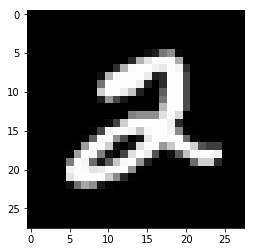

In [9]:
# plot example image
img = mnist.train.images[5]
plt.imshow(img.reshape((28,28)), cmap='Greys_r')

In [42]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
mnist.train.labels

(60000, 784)
(60000,)


4

### we'll flatten the images to 784 length vectors (images are 28x18), then we'll have a simple encoder/decode with one hidden layer.
#### The images in this set are already normalized, i.e. values are between 0 and 1

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(784, name='output', activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


In [99]:
# training time
epochs = 20

_inputs = mnist.train.images
_targets = mnist.train.images
model.fit(_inputs, _targets, epochs=epochs, batch_size=200, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.0441 - acc: 0.0125          

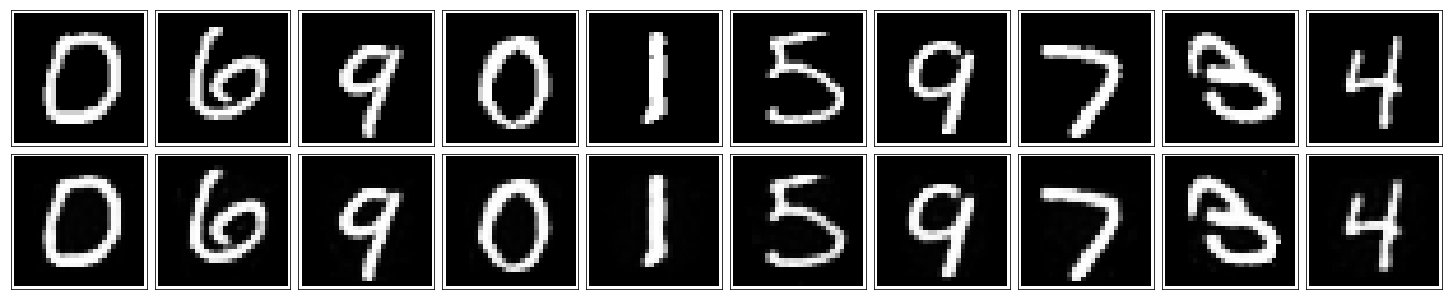

In [100]:
# checking results

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[10:20]
predict_imgs = model.predict(in_imgs, 10)

for images, row in zip([in_imgs, predict_imgs], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28, 28), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

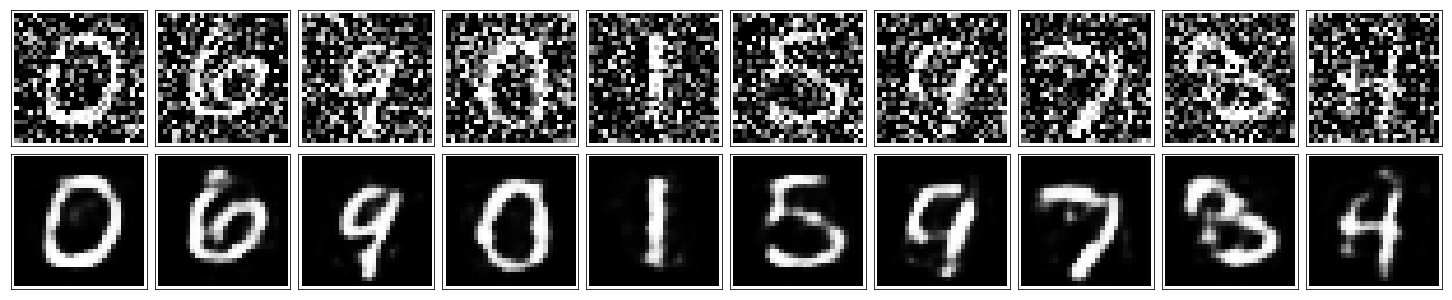

In [111]:
# checking noisy images

noise_factor = 0.5
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[10:20]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

predict_imgs = model.predict(noisy_imgs, 10)

for images, row in zip([noisy_imgs, predict_imgs], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28, 28), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [104]:
# generate noisy images 

# Add random noise to the input images
noisy_inputs = _inputs + noise_factor * np.random.randn(*_inputs.shape)
# Clip the images to be between 0 and 1
noisy_inputs = np.clip(noisy_inputs, 0., 1.)


In [139]:
# construct a model for processing noisy images
model2 = Sequential()
model2.add(Dense(128, input_shape=(784,), activation='relu'))
model2.add(Dense(784, name='output', activation='sigmoid'))

model2.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model2.summary()

epochs = 10
batch_size = 200

# train
model2.fit(noisy_inputs, _inputs, epochs=epochs, batch_size=batch_size, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.0535 - acc: 0.0113           

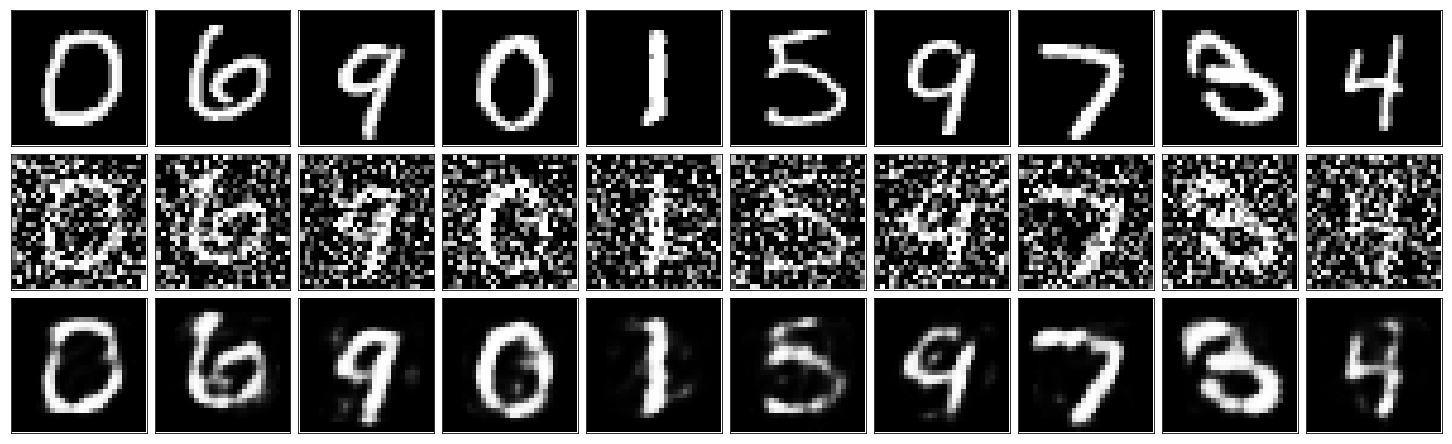

In [140]:
# checking noisy images again with model2
# we'll show the orignal, the noisy, and the de-noised images

noise_factor = 0.5
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,6))
in_imgs = mnist.test.images[10:20]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

predict_imgs = model2.predict(noisy_imgs, 10)

for images, row in zip([in_imgs, noisy_imgs, predict_imgs], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28, 28), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)